In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# change directory to the fake_news_model.py folder
os.chdir('/content/drive/MyDrive/my-flask-app')

Importing all the required libraries for preprocessing

In [3]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=cc29b93a515f9376f6a28a5d7fc1c2c6e7818329b9b8ee23eede64f45c0e857d
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [4]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import opendatasets as od
od.download("https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset")

Skipping, found downloaded files in "./fake-and-real-news-dataset" (use force=True to force download)


In [7]:
#Importing the Dataset
real_news = pd.read_csv('/content/drive/MyDrive/my-flask-app/fake-and-real-news-dataset/True.csv')
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
#Importing the Dataset
fake_news = pd.read_csv('/content/drive/MyDrive/my-flask-app/fake-and-real-news-dataset/Fake.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
#Assigning classes to the dataset
real_news['class'] = 1
fake_news['class'] = 0

In [10]:
# Dataset shape
real_news.shape, fake_news.shape

((21417, 5), (23481, 5))

In [11]:
# Merging both the Datasets
New_Dataset = pd.concat([real_news, fake_news], ignore_index=True)
New_Dataset.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
# Check for null values in Dataset
New_Dataset.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [13]:
# Reshuffling the Dataset
New_Dataset = New_Dataset.sample(frac = 1)
New_Dataset.head()

,title,text,subject,date,class
143,Factbox: Provisions of the U.S. Republicans' f...,(Reuters) - Republicans in the U.S. Congress r...,politicsNews,"December 14, 2017",1
3364,Trump says ahead of former FBI Director Comey'...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"June 6, 2017",1
35026,BOOM! MEXICAN AMERICAN TRUMP Supporter Explain...,Let me tell you something Donald Trump is not...,politics,"Jun 29, 2016",0
21272,U.N. must take 'serious' action against North ...,WASHINGTON (Reuters) - U.S. Ambassador to the ...,worldnews,"August 29, 2017",1
23407,Fox News Frantically Tries To Cover Up Trump’...,It s not clear whether Trump called in a favor...,News,"March 26, 2017",0


In [14]:
# Indexing dataset
New_Dataset.reset_index(inplace = True)
New_Dataset.head()

,index,title,text,subject,date,class
0,143,Factbox: Provisions of the U.S. Republicans' f...,(Reuters) - Republicans in the U.S. Congress r...,politicsNews,"December 14, 2017",1
1,3364,Trump says ahead of former FBI Director Comey'...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"June 6, 2017",1
2,35026,BOOM! MEXICAN AMERICAN TRUMP Supporter Explain...,Let me tell you something Donald Trump is not...,politics,"Jun 29, 2016",0
3,21272,U.N. must take 'serious' action against North ...,WASHINGTON (Reuters) - U.S. Ambassador to the ...,worldnews,"August 29, 2017",1
4,23407,Fox News Frantically Tries To Cover Up Trump’...,It s not clear whether Trump called in a favor...,News,"March 26, 2017",0


In [15]:
# Removing unwanted columns
New_Dataset = New_Dataset.drop(['index', 'title','subject','date'], axis = 1)
New_Dataset.head()

,text,class
0,(Reuters) - Republicans in the U.S. Congress r...,1
1,WASHINGTON (Reuters) - President Donald Trump ...,1
2,Let me tell you something Donald Trump is not...,0
3,WASHINGTON (Reuters) - U.S. Ambassador to the ...,1
4,It s not clear whether Trump called in a favor...,0


In [16]:
# Converting the text feature from a float object to a string object
# New_Dataset['text'] = str(New_Dataset['text'])
print(isinstance(New_Dataset['text'],(str,)))
print(New_Dataset['text'])

False
0        (Reuters) - Republicans in the U.S. Congress r...
1        WASHINGTON (Reuters) - President Donald Trump ...
2         Let me tell you something Donald Trump is not...
3        WASHINGTON (Reuters) - U.S. Ambassador to the ...
4        It s not clear whether Trump called in a favor...
                               ...                        
44893    Around the time same sex marriage was making h...
44894    Pro man-made climate change, RINO Lindsay Grah...
44895    SAN DIEGO (Reuters) - U.S. Senator Mark Kirk o...
44896    Trump to Merkel on Obama s wiretapping  at lea...
44897    In case anyone was confused about how the whol...
Name: text, Length: 44898, dtype: object


In [17]:
# Preprocessing dataset
nltk.download('wordnet')
wordnet=WordNetLemmatizer()
corpus = []

for i in range(0,len(New_Dataset)):
  review = re.sub('[^a-zA-Z]', ' ', New_Dataset['text'][i])
  review = review.lower()
  review = review.split()

  review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [18]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(corpus)


CountVectorizer()

In [20]:
print(cv.vocabulary_)

{'reuters': 78626, 'republican': 78134, 'congress': 18176, 'reached': 76289, 'deal': 21469, 'tax': 91819, 'legislation': 52549, 'wednesday': 101891, 'clearing': 16507, 'way': 101653, 'final': 31470, 'vote': 100705, 'next': 63831, 'week': 101904, 'package': 68301, 'approved': 4405, 'would': 103680, 'sent': 83635, 'president': 72874, 'donald': 24849, 'trump': 95525, 'sign': 85394, 'law': 52109, 'formal': 32590, 'language': 51734, 'expected': 29585, 'add': 947, 'least': 52376, 'trillion': 95288, 'national': 62762, 'debt': 21583, 'decade': 21598, 'released': 77596, 'following': 32346, 'known': 50217, 'provision': 73716, 'house': 41158, 'representative': 78075, 'senate': 83528, 'writer': 103850, 'agreed': 1711, 'based': 7489, 'conversation': 18630, 'aide': 1875, 'lawmaker': 52137, 'corporate': 18918, 'rate': 76044, 'fall': 30253, 'percent': 69902, 'bill': 9198, 'well': 102053, 'earlier': 26291, 'proposed': 73551, 'going': 35924, 'gave': 34372, 'federal': 30850, 'revenue': 78669, 'needed': 6

In [21]:
example = corpus[10]
example

'washington reuters michael caputo adviser president donald trump presidential campaign said thursday would testify friday u house representative committee investigating possible russian involvement election caputo political consultant issued statement saying would testify friday closed meeting house intelligence committee committee comment people plan interview caputo resigned trump campaign last year writing ding dong witch dead twitter trump fired campaign manager corey lewandowski june'

In [22]:
example = cv.transform([example])
print(example.toarray())

[[0 0 0 ... 0 0 0]]


In [23]:
#Preparing train and test sets
x = corpus
y = New_Dataset['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)

In [24]:
# Convert raw data into matrix using TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorization = CountVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [25]:
print(xv_train)

  (0, 34786)	9
  (0, 14358)	4
  (0, 3703)	1
  (0, 40512)	2
  (0, 42945)	7
  (0, 46289)	1
  (0, 52091)	1
  (0, 55220)	1
  (0, 396)	2
  (0, 42889)	1
  (0, 75622)	1
  (0, 46836)	2
  (0, 80778)	4
  (0, 73294)	1
  (0, 51842)	1
  (0, 21655)	3
  (0, 82390)	12
  (0, 54082)	1
  (0, 78847)	1
  (0, 19405)	1
  (0, 55637)	2
  (0, 27562)	2
  (0, 71821)	1
  (0, 38635)	3
  (0, 18918)	1
  :	:
  (31426, 64743)	1
  (31426, 71009)	2
  (31426, 71010)	3
  (31426, 19301)	1
  (31427, 79787)	1
  (31427, 2710)	1
  (31427, 15089)	1
  (31427, 83048)	1
  (31427, 88273)	1
  (31427, 35724)	1
  (31427, 75199)	1
  (31427, 18788)	1
  (31427, 54392)	1
  (31427, 3415)	1
  (31427, 24413)	1
  (31427, 60844)	1
  (31427, 15048)	1
  (31427, 79938)	1
  (31427, 39827)	1
  (31427, 76646)	1
  (31427, 78464)	1
  (31427, 60683)	1
  (31427, 89258)	1
  (31427, 34962)	1
  (31427, 76670)	1


In [26]:
print(y_train)

33958    0
19813    1
25814    1
18689    0
44673    1
        ..
30403    1
21243    1
42613    1
43567    0
2732     0
Name: class, Length: 31428, dtype: int64


In [27]:
print(xv_test)

  (0, 475)	2
  (0, 502)	1
  (0, 556)	2
  (0, 709)	1
  (0, 712)	2
  (0, 738)	3
  (0, 1079)	3
  (0, 1083)	1
  (0, 1221)	2
  (0, 1270)	1
  (0, 1301)	1
  (0, 1383)	4
  (0, 1387)	1
  (0, 1416)	1
  (0, 1870)	1
  (0, 1946)	1
  (0, 2235)	2
  (0, 2383)	2
  (0, 2427)	6
  (0, 2440)	6
  (0, 2482)	1
  (0, 2493)	1
  (0, 2616)	2
  (0, 2698)	8
  (0, 2710)	2
  :	:
  (13469, 66103)	1
  (13469, 66464)	1
  (13469, 68232)	1
  (13469, 70041)	3
  (13469, 71773)	1
  (13469, 71913)	1
  (13469, 72304)	1
  (13469, 73294)	2
  (13469, 74815)	1
  (13469, 75112)	1
  (13469, 75125)	1
  (13469, 75204)	1
  (13469, 77233)	7
  (13469, 77923)	1
  (13469, 78853)	1
  (13469, 80342)	1
  (13469, 80348)	2
  (13469, 80454)	1
  (13469, 83464)	1
  (13469, 84391)	2
  (13469, 86104)	1
  (13469, 86184)	2
  (13469, 87853)	1
  (13469, 89268)	1
  (13469, 89427)	1


In [28]:
# Naive Bayes
# fit the training dataset on the NB classifier
from sklearn.naive_bayes import MultinomialNB
import pickle
Naive = MultinomialNB()
Naive.fit(xv_train, y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(xv_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test))
print(classification_report(y_test, predictions_NB))

Naive Bayes Accuracy Score ->  0.9542687453600593
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7023
           1       0.95      0.96      0.95      6447

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



Confusion matrix, without normalization


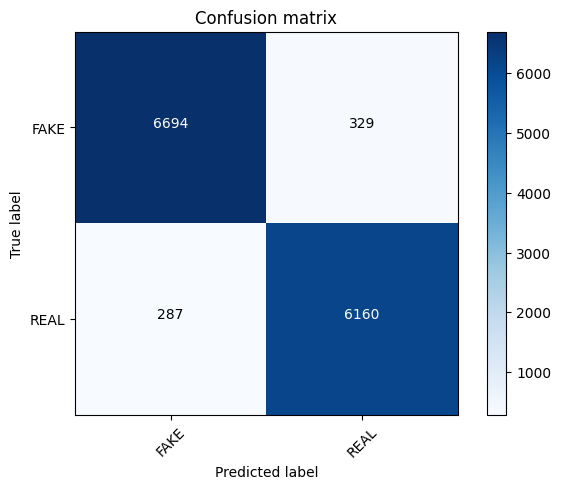

In [29]:
# Plotting the confusion matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text (j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, predictions_NB)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [30]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(xv_train, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(xv_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test))
print(classification_report(y_test, predictions_SVM))


SVM Accuracy Score ->  0.9962138084632517
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      6447

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Confusion matrix, without normalization


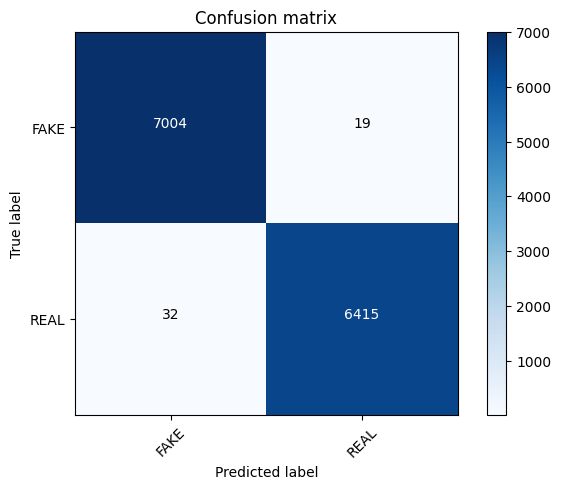

In [31]:
# Plotting the confusion matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text (j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, predictions_SVM)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [44]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
#def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
 #   model = LogisticRegression(C=_C).fit(X_tr, y_tr)
  #  score = model.score(X_test, y_test)
   # print('Test Score with', description, 'features', score)
    #return model

log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=2000)
model=log_reg.fit(xv_train, y_train)
predictions_Logreg = log_reg.predict(xv_test)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_Logreg, y_test))
print(classification_report(y_test, predictions_Logreg))

[LibLinear]Logistic Regression Accuracy Score ->  0.9965107646622123
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      6447

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Confusion matrix, without normalization


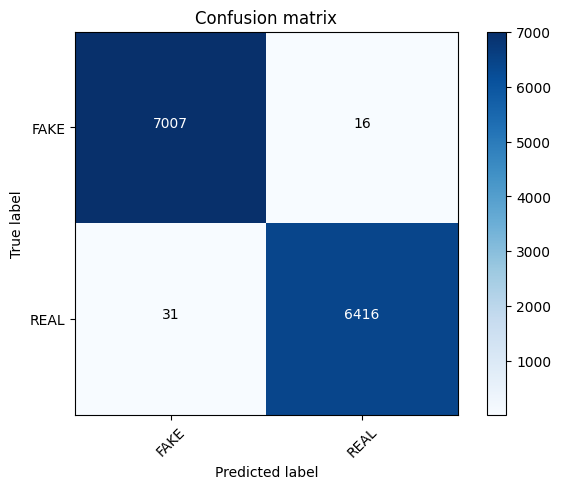

In [33]:
# Plotting the confusion matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text (j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, predictions_Logreg)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Testing the model using NB classifier

In [35]:
def preprocess_text(news):
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [36]:
def output_label(pred_prob):
    max_prob = max(pred_prob)
    if max_prob > 0.5:
        return "real news" if pred_prob[1] > pred_prob[0] else "fake news"
    else:
        return "fake news"

In [37]:
def manual_testing(news, vectorization, Naive):
    vectorization = CountVectorizer()
    xv_train = vectorization.fit_transform(x_train)
    Naive = MultinomialNB()
    Naive.fit(xv_train, y_train)
    testing_news = {"text":[news]}
    new_test = pd.DataFrame(testing_news)
    new_test["text"] = new_test["text"].apply(preprocess_text)
    new_x_test = new_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    predictions_NB = Naive.predict(new_xv_test)
    pred_prob = Naive.predict_proba(new_xv_test)[0]
    print("Prediction: {} (Probabilities: {})".format(output_label(pred_prob), pred_prob))
    print(new_x_test)
news = str(input())
manual_testing(news, vectorization, Naive)

South Korea's jobless rate in May falls to record low
Prediction: real news (Probabilities: [0.0426736 0.9573264])
0    south korea jobless rate may fall record low
Name: text, dtype: object


Testing the model using SVM classifier

In [38]:
def preprocess_text(news):
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [39]:
def output_label(pred_prob):
    max_prob = max(pred_prob)
    if max_prob > 0.5:
        return "real news" if pred_prob[1] > pred_prob[0] else "fake news"
    else:
        return "fake news"


In [40]:
from scipy.special import expit

def manual_testing(news, vectorization, SVM, new_xv_test):
    decision_scores = SVM.decision_function(new_xv_test)
    probabilities = expit(decision_scores)

    if probabilities > 0.5:
        print("Prediction: real news (Probability: {:.2f})".format(probabilities[0]))
    else:
        print("Prediction: fake news (Probability: {:.2f})".format(1 - probabilities[0]))

vectorization = CountVectorizer()
xv_train = vectorization.fit_transform(x_train)
SVM = SVC(kernel='linear', random_state=0)
SVM.fit(xv_train, y_train)

testing_news = {"text": [news]}
new_test = pd.DataFrame(testing_news)
new_test["text"] = new_test["text"].apply(preprocess_text)
new_x_test = new_test["text"]
new_xv_test = vectorization.transform(new_x_test)
news = str(input())
manual_testing(news, vectorization, SVM, new_xv_test)
print(new_x_test)

South Korea's jobless rate in May falls to record low
Prediction: fake news (Probability: 0.74)
0    south korea jobless rate may fall record low
Name: text, dtype: object


Testing the model using LR classifier

In [45]:
def preprocess_text(news):
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [46]:
def output_label(pred_prob):
    max_prob = max(pred_prob)
    if max_prob > 0.5:
        return "real news" if pred_prob[1] > pred_prob[0] else "fake news"
    else:
        return "fake news"

In [48]:
def manual_testing(news, vectorization, LR):
    vectorization = CountVectorizer()
    xv_train = vectorization.fit_transform(x_train)
    LR = LogisticRegression()
    LR.fit(xv_train, y_train)
    testing_news = {"text":[news]}
    new_test = pd.DataFrame(testing_news)
    new_test["text"] = new_test["text"].apply(preprocess_text)
    new_x_test = new_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    predictions_LR = LR.predict(new_xv_test)
    pred_prob = LR.predict_proba(new_xv_test)[0]
    print("Prediction: {} (Probabilities: {})".format(output_label(pred_prob), pred_prob))
    print(new_x_test)

news = str(input())
manual_testing(news, vectorization, LR)

A Fargo, North Dakota, man was arrested for clearing snow with a flamethrower
Prediction: fake news (Probabilities: [0.99409383 0.00590617])
0    fargo north dakota man arrested clearing snow ...
Name: text, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
